# Linear Regression (Supervised ML)

In [72]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
#Reading in the data

xls = pd.ExcelFile("ml_data_final.xlsx")

df_train = pd.read_excel(xls, "Sheet1")
df_train_og = pd.read_excel(xls, "Sheet1")

In [74]:
df_train.head()


,Product_name,Product_url,Category,Avg_review,No_of_reviews,Price,Brand,Average_sales_month
0,Lymio Women's Regular Top,https://www.amazon.in/Lymio-Womens-Regular-Top...,Clothing and accessories,4.4,197.0,379.0,Lymio,500
1,Lymio Women's Regular Color Chocker Neck Half ...,https://www.amazon.in/Lymio-Womens-Regular-Top...,Clothing and accessories,4.1,482.0,369.0,Lymio,436
2,Women Printed Slub Rayon Top with Half Sleeves,https://www.amazon.in/DHRUVI-TRENDZ-Printed-Sl...,Clothing and accessories,3.6,648.0,349.0,DHRUVI TRENDZ,321
3,Butterfly Tops for Women Stylish,https://www.amazon.in/Bhumi-fashion-Butterfly-...,Clothing and accessories,2.0,3.0,459.0,Bhumi fashion,284
4,Women's Diva Slub Regular Fit Dyed Top,https://www.amazon.in/SIRIL-WomenS-Rayon-117TK...,Clothing and accessories,3.8,367.0,359.0,SIRIL,251


In [75]:
df_train.shape

(1501, 8)

In [76]:
df_train_og

,Product_name,Product_url,Category,Avg_review,No_of_reviews,Price,Brand,Average_sales_month
0,Lymio Women's Regular Top,https://www.amazon.in/Lymio-Womens-Regular-Top...,Clothing and accessories,4.4,197.0,379.0,Lymio,500
1,Lymio Women's Regular Color Chocker Neck Half ...,https://www.amazon.in/Lymio-Womens-Regular-Top...,Clothing and accessories,4.1,482.0,369.0,Lymio,436
2,Women Printed Slub Rayon Top with Half Sleeves,https://www.amazon.in/DHRUVI-TRENDZ-Printed-Sl...,Clothing and accessories,3.6,648.0,349.0,DHRUVI TRENDZ,321
3,Butterfly Tops for Women Stylish,https://www.amazon.in/Bhumi-fashion-Butterfly-...,Clothing and accessories,2.0,3.0,459.0,Bhumi fashion,284
4,Women's Diva Slub Regular Fit Dyed Top,https://www.amazon.in/SIRIL-WomenS-Rayon-117TK...,Clothing and accessories,3.8,367.0,359.0,SIRIL,251
...,...,...,...,...,...,...,...,...
1496,Mi Pocket Power Bank Pro Black 10000mAh | Trip...,https://www.amazon.in/Pocket-10000mAh-Triple-C...,Electronics,4.3,5904.0,1399.0,Redmi,1504
1497,Mi 10000mAH Li-Polymer Power Bank 3i with 18W ...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,Electronics,4.3,79833.0,999.0,Redmi,2469
1498,Mi Power Bank 3i 20000mAh | 18W Fast PD Chargi...,https://www.amazon.in/10000mAH-Li-Polymer-Powe...,Electronics,4.3,79833.0,1699.0,Redmi,3339
1499,Redmi 9A(Midnight Black 3GB RAM 32GB Storage) ...,https://www.amazon.in/Redmi-9A-2GB-32GB-Storag...,Electronics,4.2,86791.0,7999.0,Redmi,2320


In [77]:
for i in range(df_train.shape[0]):
    df_train['Category'][i] = df_train['Category'][i].lower()
    df_train['Brand'][i] = df_train['Brand'][i].lower()

In [78]:
df_train.head()

,Product_name,Product_url,Category,Avg_review,No_of_reviews,Price,Brand,Average_sales_month
0,Lymio Women's Regular Top,https://www.amazon.in/Lymio-Womens-Regular-Top...,clothing and accessories,4.4,197.0,379.0,lymio,500
1,Lymio Women's Regular Color Chocker Neck Half ...,https://www.amazon.in/Lymio-Womens-Regular-Top...,clothing and accessories,4.1,482.0,369.0,lymio,436
2,Women Printed Slub Rayon Top with Half Sleeves,https://www.amazon.in/DHRUVI-TRENDZ-Printed-Sl...,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,Butterfly Tops for Women Stylish,https://www.amazon.in/Bhumi-fashion-Butterfly-...,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,Women's Diva Slub Regular Fit Dyed Top,https://www.amazon.in/SIRIL-WomenS-Rayon-117TK...,clothing and accessories,3.8,367.0,359.0,siril,251


In [79]:
df_train.isnull().sum()


Product_name           0
Product_url            0
Category               0
Avg_review             0
No_of_reviews          0
Price                  0
Brand                  0
Average_sales_month    0
dtype: int64

In [80]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product_name         1501 non-null   object 
 1   Product_url          1501 non-null   object 
 2   Category             1501 non-null   object 
 3   Avg_review           1501 non-null   float64
 4   No_of_reviews        1501 non-null   float64
 5   Price                1501 non-null   float64
 6   Brand                1501 non-null   object 
 7   Average_sales_month  1501 non-null   int64  
dtypes: float64(3), int64(1), object(4)
memory usage: 93.9+ KB


In [81]:
df_train.describe()

,Avg_review,No_of_reviews,Price,Average_sales_month
count,1501.000000,1501.000000,1501.000000,1501.000000
mean,4.058361,11312.517322,4230.505330,702.013324
std,0.471146,34765.415938,11855.146388,1066.252901
min,1.000000,1.000000,10.000000,0.000000
25%,3.900000,167.000000,399.000000,36.000000
50%,4.100000,786.000000,690.000000,199.000000
75%,4.400000,6595.000000,1565.000000,949.000000
max,5.000000,396978.000000,134990.000000,8345.000000


In [82]:
df_train.drop(['Product_name','Product_url'],axis=1,inplace=True)
#Taking of the columns which are of no use

In [83]:
df_train

,Category,Avg_review,No_of_reviews,Price,Brand,Average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1496,electronics,4.3,5904.0,1399.0,redmi,1504
1497,electronics,4.3,79833.0,999.0,redmi,2469
1498,electronics,4.3,79833.0,1699.0,redmi,3339
1499,electronics,4.2,86791.0,7999.0,redmi,2320


## Exploratory data analysis with dtale library

In [13]:
import dtale

In [14]:
dtale.show(df_train)

2021-12-22 07:22:16,006 - INFO     - NumExpr defaulting to 8 threads.


### Finding correlation between different features using heatmap 

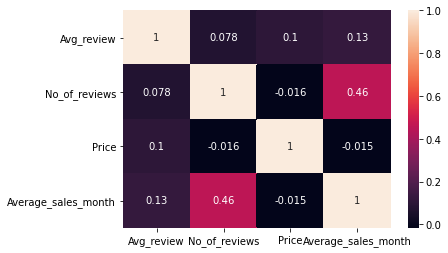

In [84]:
#plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

## EDA using KLib library

In [85]:
import klib

GridSpec(6, 2)

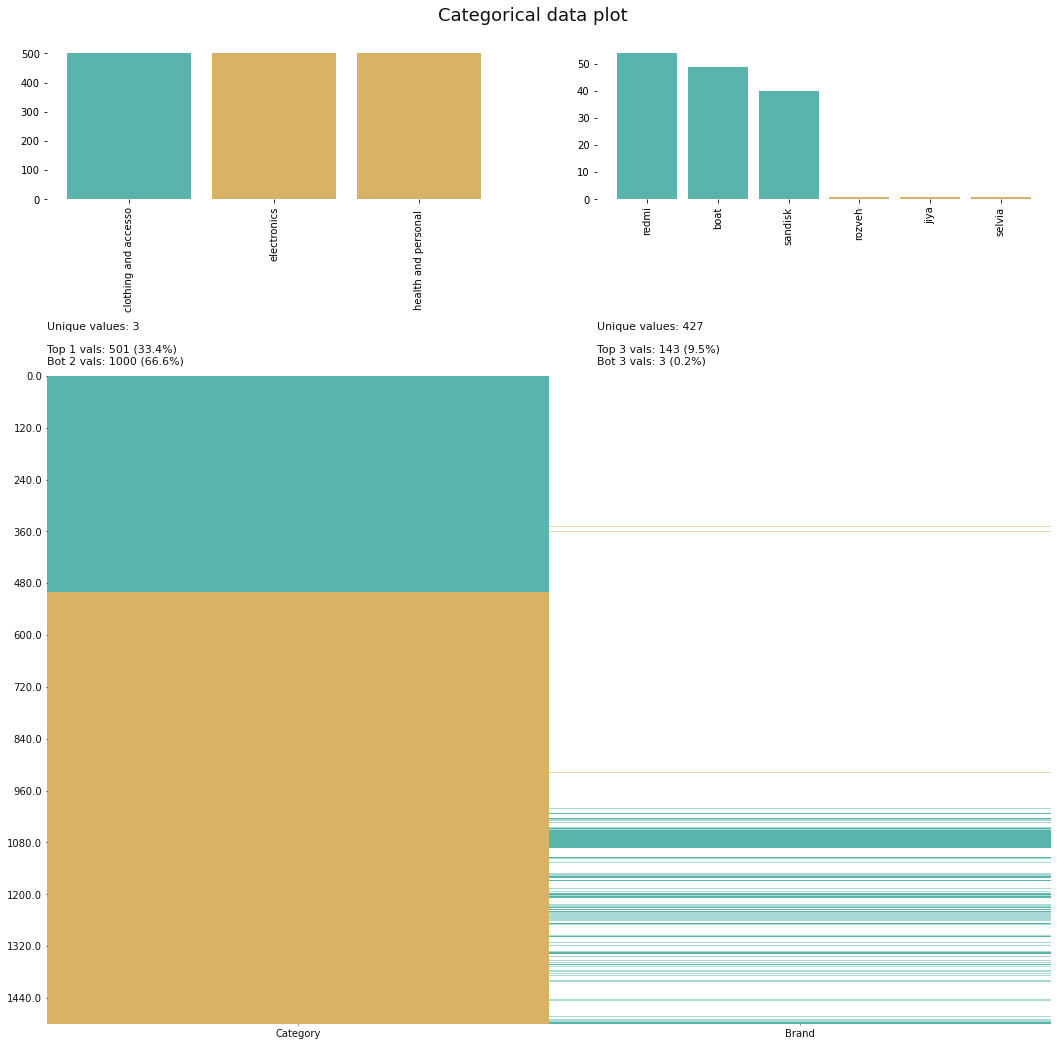

In [86]:
klib.cat_plot(df_train)

In [87]:
klib.corr_mat(df_train)

,Avg_review,No_of_reviews,Price,Average_sales_month
Avg_review,1.00,0.08,0.10,0.13
No_of_reviews,0.08,1.00,-0.02,0.46
Price,0.10,-0.02,1.00,-0.01
Average_sales_month,0.13,0.46,-0.01,1.00


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

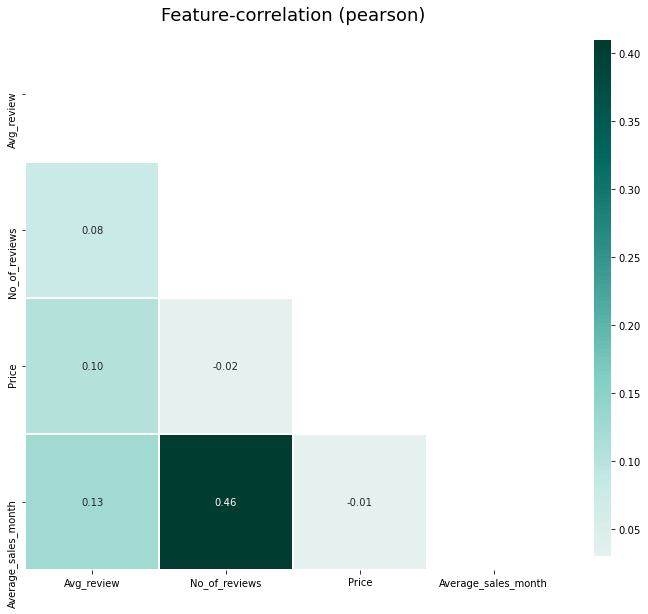

In [88]:
klib.corr_plot(df_train)

<AxesSubplot:xlabel='Average_sales_month', ylabel='Density'>

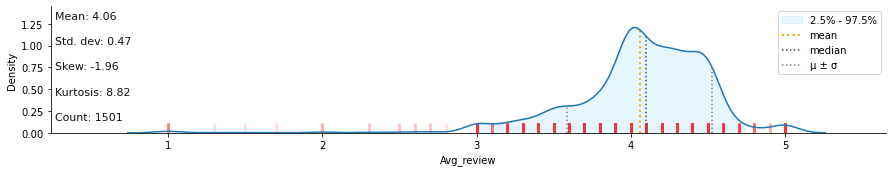

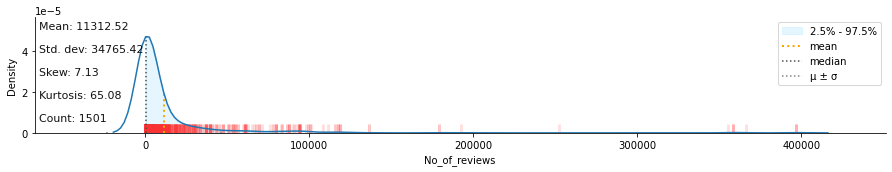

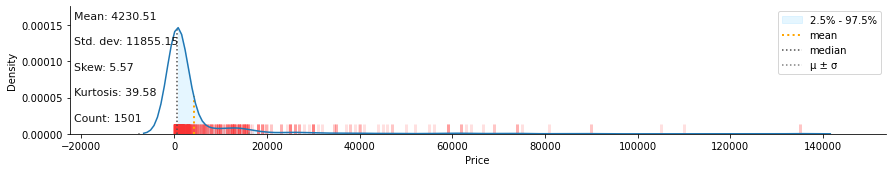

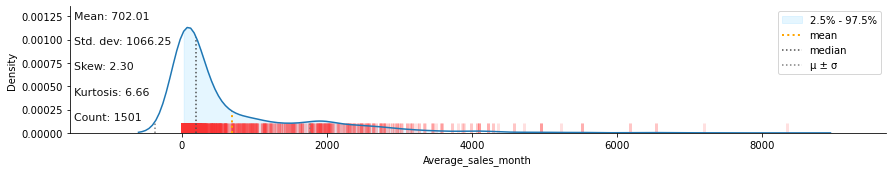

In [89]:
klib.dist_plot(df_train)

# Data cleaning using KLib library

In [21]:
klib.missingval_plot(df_train)

No missing values found in the dataset.


In [22]:
df_train = klib.data_cleaning(df_train)

Shape of cleaned data: (1405, 6)Remaining NAs: 0

Changes:
Dropped rows: 96
     of which 96 duplicates. (Rows: [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 194, 195, 199, 255, 478, 502, 504, 505, 506, 1164, 1360, 1372, 1399, 1428, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1453, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-57.14%)



In [23]:
klib.clean_column_names(df_train) # cleans and standardizes column names, also called 

,category,avg_review,no_of_reviews,price,brand,average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951
1401,electronics,4.6,6532.0,1495.0,logitech,449
1402,electronics,4.6,4123.0,1482.0,logitech,411
1403,electronics,4.2,28964.0,229.0,redmi,1296


In [24]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             1405 non-null   category
 1   avg_review           1405 non-null   float32 
 2   no_of_reviews        1405 non-null   float32 
 3   price                1405 non-null   float32 
 4   brand                1405 non-null   string  
 5   average_sales_month  1405 non-null   int16   
dtypes: category(1), float32(3), int16(1), string(1)
memory usage: 31.8 KB


In [25]:
df_train = klib.convert_datatypes(df_train) # converts existing to more efficient dtypes, also called inside data_cleaning()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   category             1405 non-null   category
 1   avg_review           1405 non-null   Float32 
 2   no_of_reviews        1405 non-null   Float32 
 3   price                1405 non-null   Float32 
 4   brand                1405 non-null   string  
 5   average_sales_month  1405 non-null   int16   
dtypes: Float32(3), category(1), int16(1), string(1)
memory usage: 35.9 KB


In [26]:
klib.mv_col_handling(df_train)

,category,avg_review,no_of_reviews,price,brand,average_sales_month
0,clothing and accessories,4.4,197.0,379.0,lymio,500
1,clothing and accessories,4.1,482.0,369.0,lymio,436
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284
4,clothing and accessories,3.8,367.0,359.0,siril,251
...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951
1401,electronics,4.6,6532.0,1495.0,logitech,449
1402,electronics,4.6,4123.0,1482.0,logitech,411
1403,electronics,4.2,28964.0,229.0,redmi,1296


# Pre processing task before model building

### Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
#df_train_std = df_train

In [29]:
df_train['category_le']= le.fit_transform(df_train['category'])
df_train['brand_le']= le.fit_transform(df_train['brand'])

In [30]:
df_train

,category,avg_review,no_of_reviews,price,brand,average_sales_month,category_le,brand_le
0,clothing and accessories,4.4,197.0,379.0,lymio,500,0,221
1,clothing and accessories,4.1,482.0,369.0,lymio,436,0,221
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321,0,93
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284,0,47
4,clothing and accessories,3.8,367.0,359.0,siril,251,0,343
...,...,...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951,1,315
1401,electronics,4.6,6532.0,1495.0,logitech,449,1,218
1402,electronics,4.6,4123.0,1482.0,logitech,411,1,218
1403,electronics,4.2,28964.0,229.0,redmi,1296,1,316


In [31]:
df_train['category'][1020]

'electronics'

In [32]:
# 0 : Clothing
# 1 : Electronics
# 2 : Health care
#print('''The label encoder has encoded the categories as :
#        0. Clothing
#        1. Electronics
#        2. Health care''')

In [33]:
#df_train = df_train.reset_index()

In [34]:
X=df_train.drop('average_sales_month',axis=1)
#X = df_train.drop('category', axis = 1)
#X = df_train.drop('brand', axis = 1)

In [35]:
X = X.drop('category', axis = 1)


In [36]:
X = X.drop('brand', axis = 1)

In [37]:
X

,avg_review,no_of_reviews,price,category_le,brand_le
0,4.4,197.0,379.0,0,221
1,4.1,482.0,369.0,0,221
2,3.6,648.0,349.0,0,93
3,2.0,3.0,459.0,0,47
4,3.8,367.0,359.0,0,343
...,...,...,...,...,...
1400,4.3,6510.0,549.0,1,315
1401,4.6,6532.0,1495.0,1,218
1402,4.6,4123.0,1482.0,1,218
1403,4.2,28964.0,229.0,1,316


In [38]:
Y = df_train['average_sales_month']

In [39]:
Y

0        500
1        436
2        321
3        284
4        251
        ... 
1400     951
1401     449
1402     411
1403    1296
1404    1279
Name: average_sales_month, Length: 1405, dtype: int16

In [40]:
## Splitting data into training and testing 

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [41]:
X_train

,avg_review,no_of_reviews,price,category_le,brand_le
1088,4.3,118593.0,1990.0,1,268
126,4.3,18.0,1097.0,0,400
567,1.0,4.0,649.0,2,219
63,2.7,15.0,1119.0,0,406
137,4.0,82.0,519.0,0,400
...,...,...,...,...,...
973,3.6,1207.0,2199.0,1,324
75,4.0,24.0,360.0,0,212
599,4.5,13476.0,311.0,2,215
1361,3.7,9256.0,1299.0,1,62


## Standardization

In [42]:
X.describe()

,avg_review,no_of_reviews,price,category_le,brand_le
count,1405.000000,1405.000000,1405.000000,1405.000000,1405.000000
mean,4.055800,11115.551758,3964.181885,1.019217,231.662633
std,0.469546,35014.593750,11107.629883,0.828826,122.015488
min,1.000000,1.000000,10.000000,0.000000,0.000000
25%,3.900000,178.000000,380.000000,0.000000,125.000000
50%,4.100000,754.000000,675.000000,1.000000,236.000000
75%,4.400000,6227.000000,1499.000000,2.000000,325.000000
max,5.000000,396978.000000,134990.000000,2.000000,426.000000


In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [44]:
X_train

,avg_review,no_of_reviews,price,category_le,brand_le
1088,4.3,118593.0,1990.0,1,268
126,4.3,18.0,1097.0,0,400
567,1.0,4.0,649.0,2,219
63,2.7,15.0,1119.0,0,406
137,4.0,82.0,519.0,0,400
...,...,...,...,...,...
973,3.6,1207.0,2199.0,1,324
75,4.0,24.0,360.0,0,212
599,4.5,13476.0,311.0,2,215
1361,3.7,9256.0,1299.0,1,62


In [45]:
X_train_std = sc.fit_transform(X_train)

In [46]:
X_test_std= sc.transform(X_test)

In [47]:
X_train_std

array([[ 0.5072032 ,  3.0251873 , -0.18393741, -0.02155924,  0.29439359],
       [ 0.5072032 , -0.30707258, -0.26141909, -1.23318829,  1.37710115],
       [-6.50740053, -0.30746601, -0.30029008,  1.19006981, -0.10752058],
       ...,
       [ 0.93233027,  0.07113154, -0.32961686,  1.19006981, -0.1403299 ],
       [-0.76817952, -0.04746122, -0.24389244, -0.02155924, -1.39528638],
       [ 0.5072032 , -0.28371936, -0.315127  ,  1.19006981, -0.3863998 ]])

In [48]:
import joblib

In [49]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [50]:
lr.fit(X_train_std, Y_train)

LinearRegression()

In [51]:
X_test.head()

,avg_review,no_of_reviews,price,category_le,brand_le
1040,4.3,10852.0,569.0,1,325
1191,4.2,31999.0,630.0,1,167
1380,4.4,16824.0,2295.0,1,218
2,3.6,648.0,349.0,0,93
1131,4.3,4152.0,43999.0,1,316


In [52]:
Y_pred_lr=lr.predict(X_test_std)

In [53]:
Y_pred_lr
X_test_std.shape

(281, 5)

## Performance evalution

In [54]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
print('R2 score : ', r2_score(Y_test,Y_pred_lr))
print('mean absolute error : ',mean_absolute_error(Y_test,Y_pred_lr))
print('Mean squared error : ',np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))



R2 score :  0.28925316142544744
mean absolute error :  629.3527627070921
Mean squared error :  1012.8931272729436


In [56]:
joblib.dump(lr,r'outputs\lr.sav')

['outputs\\lr.sav']

### Testing the model in real time

In [57]:
brands_health = []
brands_cloth = []
brands_electronics = []

In [58]:
for i in range(0, 469):
    brands_cloth.append((df_train['brand'][i]))

for i in range(469, 965):
    brands_health.append((df_train['brand'][i]))

for i in range(965, 1405):
    brands_electronics.append(df_train['brand'][i])

In [59]:
#len(brands_cloth)

In [60]:
brands_cloth = list(set(brands_cloth))
brands_health = list(set(brands_health))
brands_electronics = list(set(brands_electronics))

In [61]:
cat_in_label = 1000
cat_in = input("Enter the name of the category : ").lower()
cat_in = cat_in.lower()

if cat_in == "electronics":
    print(f"The available brands in {cat_in} are : ", brands_electronics)
    for idx, i in enumerate(df_train_og['Category']):
        if i.lower() == cat_in:
            cat_in_label = X_train['category_le'][idx+1]
            break
elif cat_in == "clothing and accessories":
    print(f"The available brands in {cat_in} are : ", brands_cloth)
    for idx, i in enumerate(df_train_og['Category']):
        if i.lower() == cat_in:
            cat_in_label = X_train['category_le'][idx+1]
            break
elif cat_in == "health and personal care":
    print(f"The available brands in {cat_in} are :", brands_health)
    for idx, i in enumerate(df_train_og['Category']):
        if i.lower() == cat_in:
            cat_in_label = X_train['category_le'][idx+1]
            break
else :
    print(f"{cat_in} doesn't exist")


#print(cat_in_label)

The available brands in electronics are :  ['motorola', 'saregama', 'nokia', 'jbl', 'acer', 'honor', 'msi', 'sony', 'lava', 'tp-link', 'lenovo ', 'asus', 'hyperx', 'lenovo', 'razer', 'redgear', 'amazon', 'redmi', 'corsair', 'noise', 'mivi', 'boult', 'wecool', 'dell', 'oneplus', 'sennheiser', 'boat', 'logitech', 'vivo', 'sandisk', 'gionee', 'zebronics', 'realme', 'lg', 'ptron', 'bose', 'oppo', 'philips', 'hp', 'samsung']


In [62]:
brand_in = input("Choose one of the above brand : ")

if cat_in == 'electronics':
    if brand_in in brands_electronics :
        for idx, i in enumerate(df_train['brand']):
            brand_in_label = df_train['brand_le'][idx]
    else :
        print("The selected brand is not in our database!")

elif cat_in == "health and personal care":
    if brand_in in brands_health:
        for idx, i in enumerate(df_train['brand']):
            brand_in_label = df_train['brand_le'][idx]
    else :
        print("The selected brand in not in our database!")

elif cat_in == "clothing and accessories":
    if brand_in in brands_cloth:
        for idx, i in enumerate(df_train['brand']):
            brand_in_label = df_train['brand_le'][idx]
    else :
        print("The selected brand is not in our database!")

In [63]:
brand_in_label

88

In [64]:
            avg_review_in = float(input("Enter the average review of the product : "))
            avg_review_in_std = (avg_review_in - np.mean(df_train['avg_review'])) / np.std(df_train['avg_review'])


            no_of_reviews_in = int(input("Enter the number of reviews in : "))
            no_of_reviews_in_std = (no_of_reviews_in - np.mean(df_train['no_of_reviews'])) / np.std(df_train['no_of_reviews'])

            price_in = float(input("Enter the price of the product : "))
            price_in_std = (price_in - np.mean(df_train['price'])) / np.std(df_train['price'])

            #cat_in_label, brand_in_label

            cat_in_label_std = (cat_in_label - np.mean(df_train['category_le'])) / np.std(df_train['category_le'])

            brand_in_label_std = (brand_in_label - np.mean(df_train['brand_le'])) / np.std(df_train['brand_le'])

            inputs = np.array([[avg_review_in_std, no_of_reviews_in_std, price_in_std, cat_in_label_std, brand_in_label_std]], dtype = np.float32)

In [65]:
df_train

,category,avg_review,no_of_reviews,price,brand,average_sales_month,category_le,brand_le
0,clothing and accessories,4.4,197.0,379.0,lymio,500,0,221
1,clothing and accessories,4.1,482.0,369.0,lymio,436,0,221
2,clothing and accessories,3.6,648.0,349.0,dhruvi trendz,321,0,93
3,clothing and accessories,2.0,3.0,459.0,bhumi fashion,284,0,47
4,clothing and accessories,3.8,367.0,359.0,siril,251,0,343
...,...,...,...,...,...,...,...,...
1400,electronics,4.3,6510.0,549.0,redgear,951,1,315
1401,electronics,4.6,6532.0,1495.0,logitech,449,1,218
1402,electronics,4.6,4123.0,1482.0,logitech,411,1,218
1403,electronics,4.2,28964.0,229.0,redmi,1296,1,316


In [66]:
#inputs_std= sc.transform(inputs)
Y_pred = lr.predict(inputs)


In [67]:
print("The average sales of the product described will be : {}".format(int(Y_pred[0])))

The average sales of the product described will be : 506
